In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

import PIL
import os, pathlib
import numpy as np

from application.utils import Utils

In [18]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [4]:
trainX.shape

(60000, 28, 28)

In [5]:
sample_image = trainX[0,:,:]

In [6]:
print(f'Data shape: {sample_image.shape}')
image = PIL.Image.fromarray(sample_image)
image

Data shape: (28, 28)


In [7]:
trainY[0]

5

In [8]:
path_to_images = pathlib.Path(os.getcwd()).parent.resolve() / 'test/test_files'
path_to_images

WindowsPath('S:/PyProj/CNN_MNIST_PYQT/test/test_files')

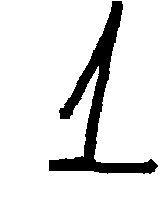

In [9]:
sample_image_own = PIL.Image.open(path_to_images / 'image_1.png')
sample_image_own

In [11]:
processed_own_image = Utils.get_formatted_image(sample_image_own, as_ndarray=False)
processed_own_image.convert('L')

In [19]:
# reshape dataset to satisfy Conv2D layer requirements, normalize the data
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255

# one hot encode target values using keras build-in method
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [20]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [25]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)
# save model
model.save('digit_model.h5')

Epoch 1/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1328 - accuracy: 0.9588
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0313 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0227 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0160 - accuracy: 0.9951
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0120 - accuracy: 0.9961
Epoch 7/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0089 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0070 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0066 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 45s 24m

In [28]:
print(f'Accuracy on test dataset is {(acc * 100.0):.3f}')

Accuracy on test dataset is 99.090


In [35]:
model = load_model('digit_model.h5')

In [42]:
sample_image_np = Utils.get_formatted_image(sample_image_own).reshape((28, 28, 1))

In [43]:
sample_image_np.shape

(28, 28, 1)

In [51]:
np.array([(np.array(sample_image_np) / 255).astype('int')]).shape

(1, 28, 28, 1)

In [52]:
model.predict(np.array([(np.array(sample_image_np) / 255).astype('int')]))

1/1 [==============================] - 0s 68ms/step


array([[2.4149510e-16, 1.7621629e-18, 1.0000000e+00, 7.2323857e-15,
        5.1674510e-23, 7.6324681e-27, 1.6443204e-20, 2.0735682e-15,
        3.8898346e-10, 7.3967779e-24]], dtype=float32)

In [45]:
trainX, testX = prep_pixels(trainX, testX)

In [46]:
trainX.shape

(60000, 28, 28, 1)

In [24]:
import tensorflow.keras as tk
tk.__version__

'2.11.0'